In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def show_image(image, cmap = None, fig_size = (9, 9)):
    fig, ax = plt.subplots(figsize=fig_size)
    ax.imshow(image, cmap = cmap)
    ax.axis('off')
    plt.show()

## 1. Drawing Shapes

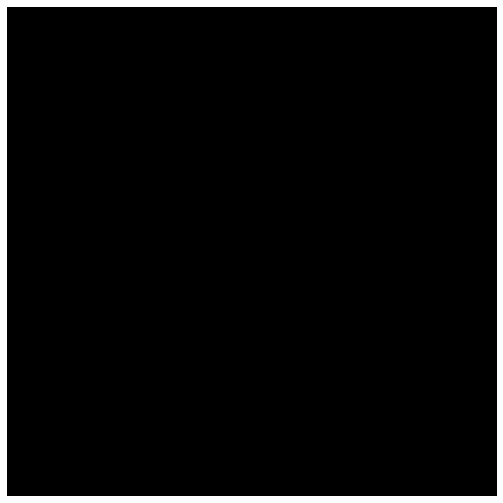

In [3]:
canvas = np.zeros((400, 400, 3), dtype="uint8") #300, 300 i.e. pixels...the larger the num the more pixels given
show_image(canvas)

### 1.1 Drawing Lines

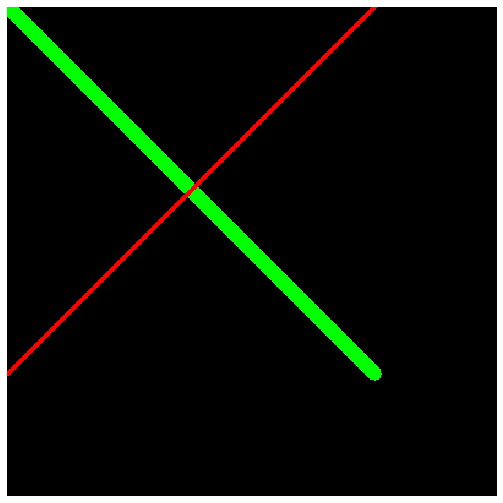

In [4]:
green = (0, 255, 0)
cv2.line(canvas, (0, 0), (300, 300), green, 10)

red = (0, 0, 255)
cv2.line(canvas, (300, 0), (0, 300), red, 2)

show_image(np.flip(canvas, axis=2))


### 1.2 Drawing Rectangles

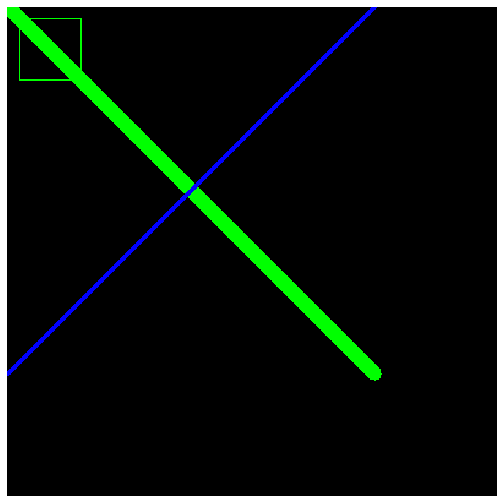

In [5]:
cv2.rectangle(canvas, (10, 10), (60, 60), green, 1)
show_image(canvas)

### 1.3 Drawing Circles

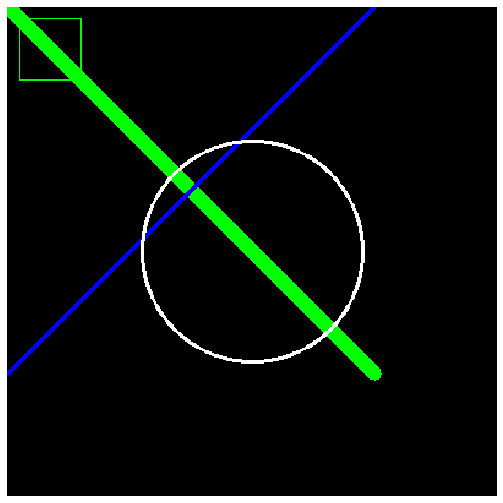

In [6]:
clone=canvas.copy()
white = (255, 255, 255)
radius = 90
(centerX, centerY) = (clone.shape[1] // 2, clone.shape[0] // 2)
cv2.circle(clone, (centerX, centerY), radius, white, 2)   #thickness, -1 at the end will give back solid colour 
show_image(clone)



### EXERCISE: Draw Random shapes

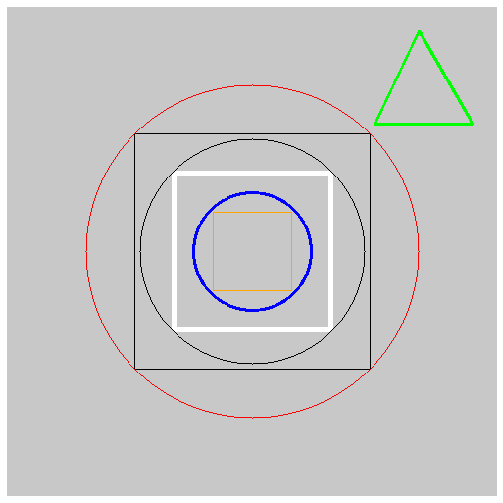

n_shape: 3


In [18]:
# TODO: Use a random number generator to draw random number of shapes in various sizes over the canvas

import random
import numpy as np
import math
import cv2

g_canvas = 200 *np.ones((500,500,3), dtype = "uint8")

#generate a random number in the range of 1-20 
#and this determines the number of circle and squares drawn equally
n = random.randrange(2,9)

n_shape = math.floor(n/2)

#create some colour options
green = (0, 255, 0)
grey = (255,255,255)
blue = (0, 0, 255)
orange = (255, 165, 0)
red = (255, 0, 0)
black = (0, 0, 0)
colours = [green, grey, red, orange, blue, black]

rect_0 = 40
radius = 60

for i in range(0, n_shape):
    
    #codes for specifiying the properties of and drawing a rectangle
    thick_r = random.randrange(1,4)
    c_r = random.randrange(0,6)
    cv2.rectangle(g_canvas, (250-rect_0, 250-rect_0), (250+rect_0, 250+rect_0), colours[c_r], thick_r)
    rect_0 += 40
    
    #codes for specifiying the properties of and drawing a circle
    thick_c = random.randrange(1,4)
    c_c = random.randrange(0,6)
    (centerX, centerY) = (g_canvas.shape[1] // 2, g_canvas.shape[0] // 2)
    cv2.circle(g_canvas, (centerX, centerY), radius, colours[c_c], thick_c)   #thickness, -1 at the end will give back solid colour 
    radius += 55

#codes for specifiying the properties of and drawing a triangle
v1 = (420, 25)
v2 = (375, 120)
v3 = (475, 120)
thick_t = random.randrange(1,4)
c_t = random.randrange(0,6)

triangle_cnt = np.array( [v1, v2, v3] )
cv2.drawContours(g_canvas, [triangle_cnt], 0, colours[c_t], thick_t)
    
show_image(g_canvas)

print(f'n_shape: {n_shape}')

## 2. Masks

### 2.1: Drawing Shape Masks

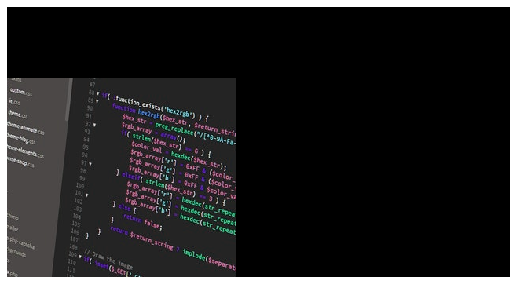

In [21]:
image = cv2.imread('../img/coding.png')
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (0, 90), (290, 500), 255, -10)

masked = cv2.bitwise_and(image, image, mask=mask)
show_image(masked)

### 2.2: Extracting Objects from Images

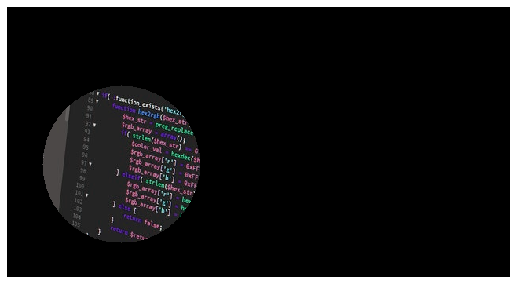

In [22]:
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.circle(mask, (145, 200), 100, 255, -1)
masked = cv2.bitwise_and(image, image, mask=mask)
show_image(masked)

### EXERCISE: Crop Out a muffin from this image using a rectangular mask

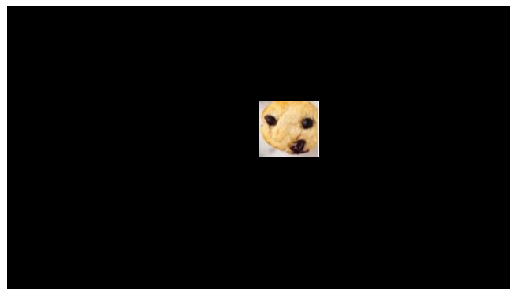

In [23]:
image = np.flip(cv2.imread('../img/dog_muffin.jpg'), axis=2)

exMask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(exMask, (320, 120), (395, 190), 255, -1)

maskedImg = cv2.bitwise_and(image, image, mask=exMask)

show_image(maskedImg)

In [ ]:
# %load ../solutions/dog_muffin.py

## 3. Geometrical Transformations

### 3.1 Translation

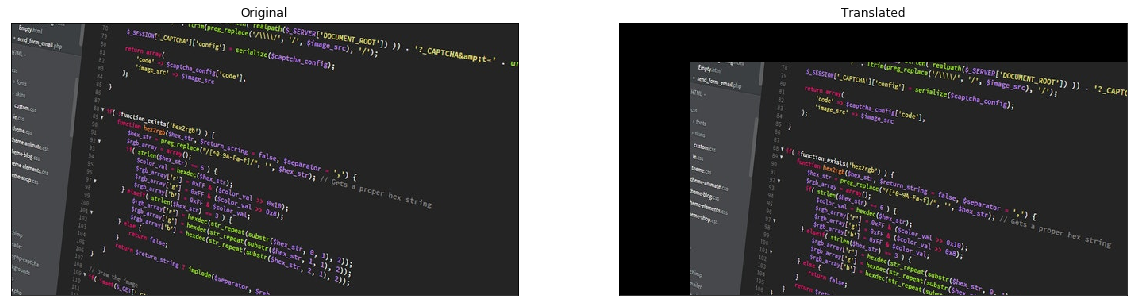

In [24]:
image = np.flip(cv2.imread('../img/coding.png'), axis =2)
M = np.float32([[1, 0, 90], [0, 1, 50]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

plt.figure(figsize=(20,10))
plt.subplot(1,2,1),plt.imshow(image)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(shifted)
plt.title('Translated'), plt.xticks([]), plt.yticks([])
plt.show()

### 3.2 Rotation

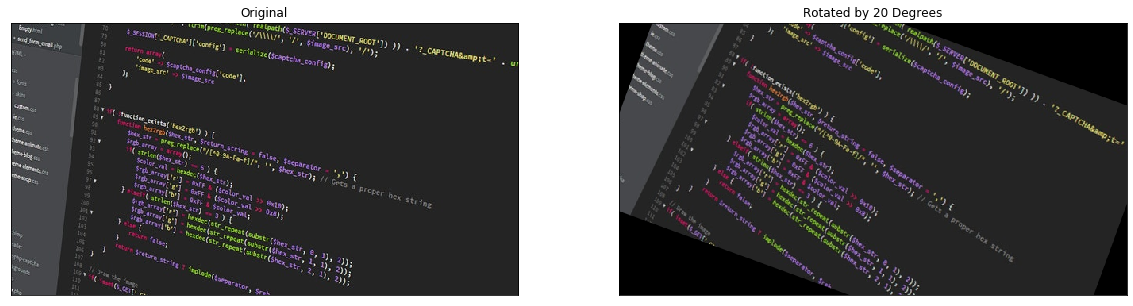

In [25]:
image = np.flip(cv2.imread('../img/coding.png'), axis =2)
(h, w) = image.shape[:2]
(cX, cY) = (w / 2, h / 2)

M = cv2.getRotationMatrix2D((cX, cY), -20, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))

plt.figure(figsize=(20,10))
plt.subplot(1,2,1),plt.imshow(image)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(rotated)
plt.title('Rotated by 20 Degrees'), plt.xticks([]), plt.yticks([])
plt.show()

### 3.3 Scaling

In [ ]:
print(cv2.imread('../img/coding.png').shape[:2])
show_image(image)

Original shape: (344, 640, 3) vs Resized shape (1075, 2000, 3)


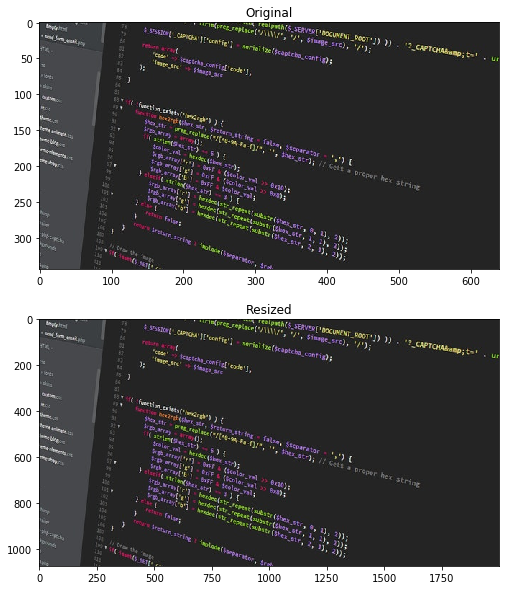

In [26]:
image = np.flip(cv2.imread('../img/coding.png'), axis =2)
height, width = image.shape[:2]
resized_width = 2000

# calculating ratio of new image to old image
ratio = resized_width / width
dim = (resized_width, int(height * ratio))

resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)

print(f'Original shape: {image.shape} vs Resized shape {resized.shape}')
plt.figure(figsize=(20,10))
plt.subplot(2,1,1), plt.imshow(image) 
plt.title('Original')
plt.subplot(2,1,2), plt.imshow(resized)
plt.title('Resized')
plt.show()

Original shape: (344, 640, 3) vs Resized shape (688, 1280, 3)


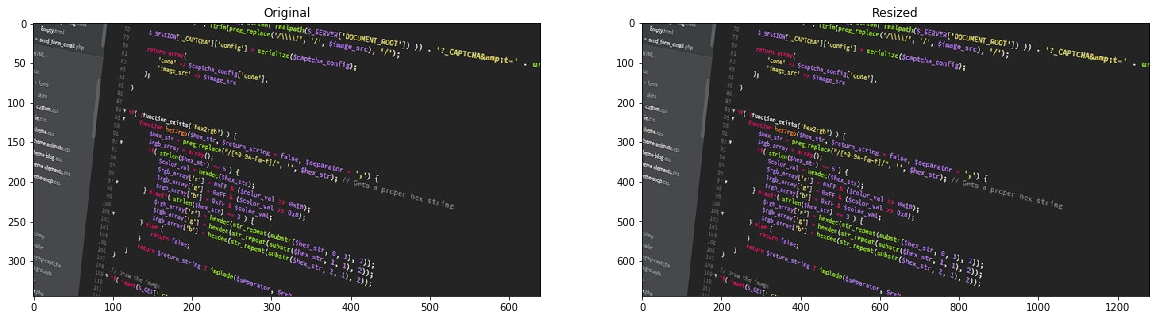

In [27]:
image = np.flip(cv2.imread('../img/coding.png'), axis =2)
height, width = image.shape[:2]
resized_height = 688

# calculating ratio of new image to old image
ratio = resized_height / height
dim = (int(width * ratio), resized_height)

resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)

print(f'Original shape: {image.shape} vs Resized shape {resized.shape}')
plt.figure(figsize=(20,10))
plt.subplot(1,2,1), plt.imshow(image) 
plt.title('Original')
plt.subplot(1,2,2), plt.imshow(resized)
plt.title('Resized')
plt.show()

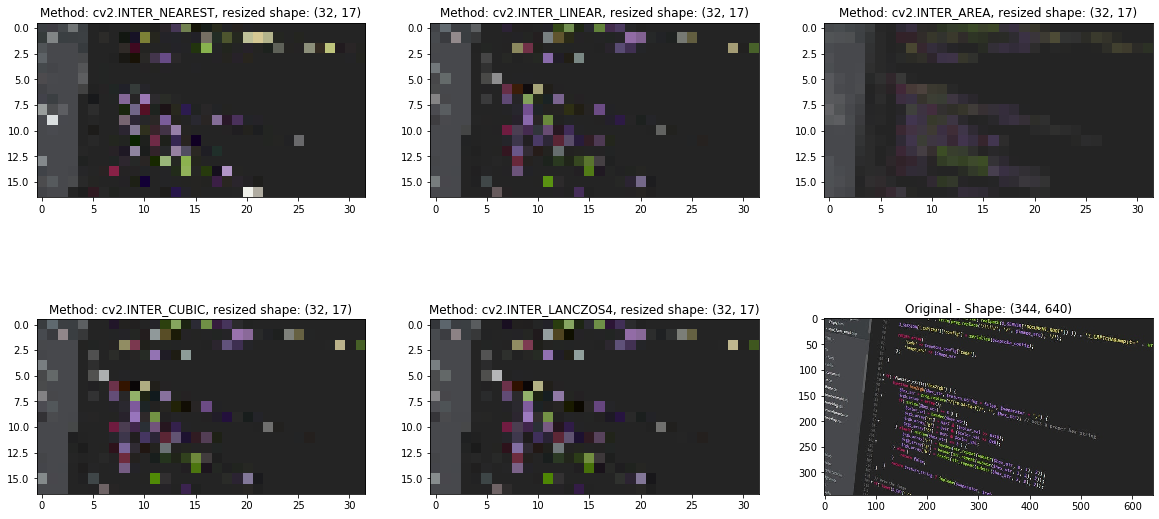

In [28]:
image = np.flip(cv2.imread('../img/coding.png'), axis =2)

# Resizing the image - Note, required dimension tuple can only accept integers (pixel locations)
# Note: Image shape must be reversed as order of width and height is different since we are flipping the image matrix above
resize_times = 0.05
dim = tuple(map(lambda x: int(x * resize_times), reversed(image.shape[:2])))

# construct the list of interpolation methods
methods = [
    ("cv2.INTER_NEAREST", cv2.INTER_NEAREST),
    ("cv2.INTER_LINEAR", cv2.INTER_LINEAR),
    ("cv2.INTER_AREA", cv2.INTER_AREA),
    ("cv2.INTER_CUBIC", cv2.INTER_CUBIC),
    ("cv2.INTER_LANCZOS4", cv2.INTER_LANCZOS4)]
 
plt.figure(figsize=(20,10))

# loop over the interpolation methods
for i, (name, method) in enumerate(methods):
    # increase the size of the image by 3x using the current interpolation method
    resized = cv2.resize(image, dim, interpolation=method)
    plt.subplot(2,3,i+1),plt.imshow(resized)
    plt.title(f'Method: {name}, resized shape: {dim}')

plt.subplot(2,3,6), plt.imshow(image) 
plt.title(f'Original - Shape: {image.shape[:2]}')
    
plt.show()

In [29]:
image.shape[:2]

(344, 640)

### 3.4 Flipping

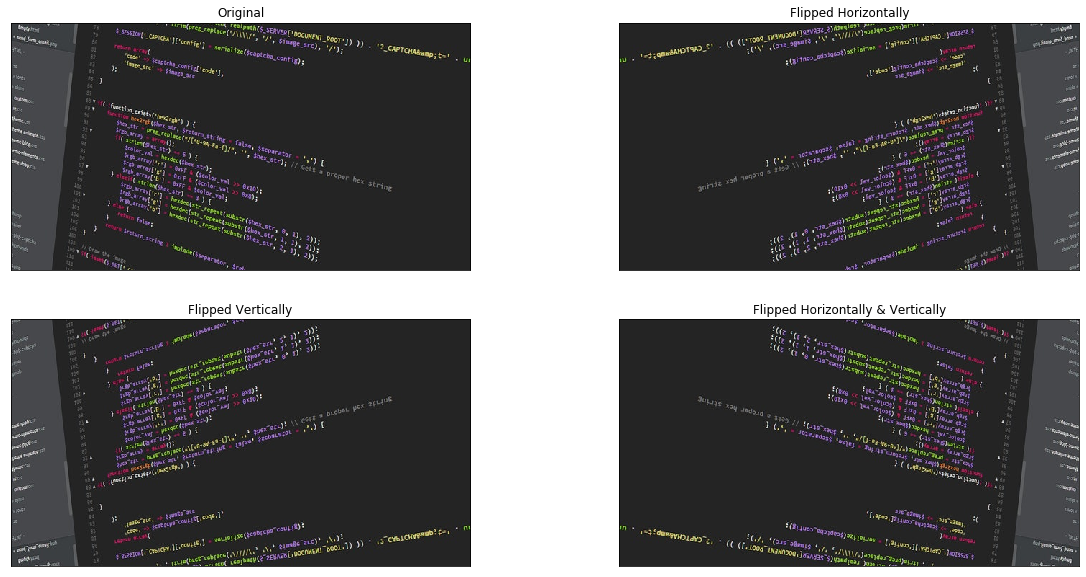

In [30]:
image = np.flip(cv2.imread('../img/coding.png'), axis =2)

# flip the image horizontally
hflipped = cv2.flip(image, 1)
 
# flip the image vertically
vflipped = cv2.flip(image, 0)
 
# flip the image along both axes
hvflipped = cv2.flip(image, -1)

plt.figure(figsize=(20,10))
plt.subplot(2,2,1),plt.imshow(image)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(hflipped)
plt.title('Flipped Horizontally'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(vflipped)
plt.title('Flipped Vertically'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(hvflipped)
plt.title('Flipped Horizontally & Vertically'), plt.xticks([]), plt.yticks([])
plt.show()

### 3.5 Cropping

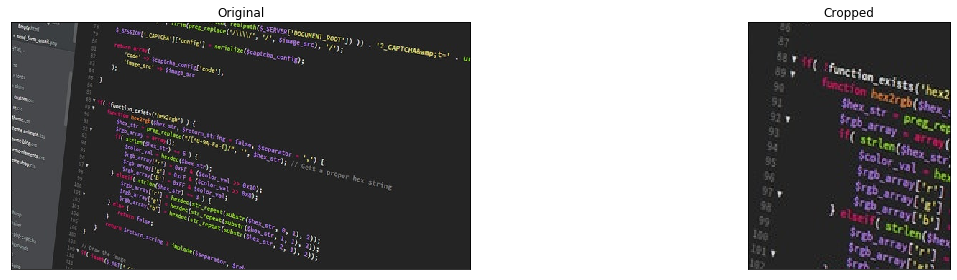

In [31]:
image = np.flip(cv2.imread('../img/coding.png'), axis =2)
cropped = image[85:250, 85:220]

plt.figure(figsize=(20,10))
plt.subplot(2,2,1),plt.imshow(image)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(cropped)
plt.title('Cropped'), plt.xticks([]), plt.yticks([])
plt.show()

### 3.6 Image Arithmetic

Original [136 118 178], Added: [236 218 255]


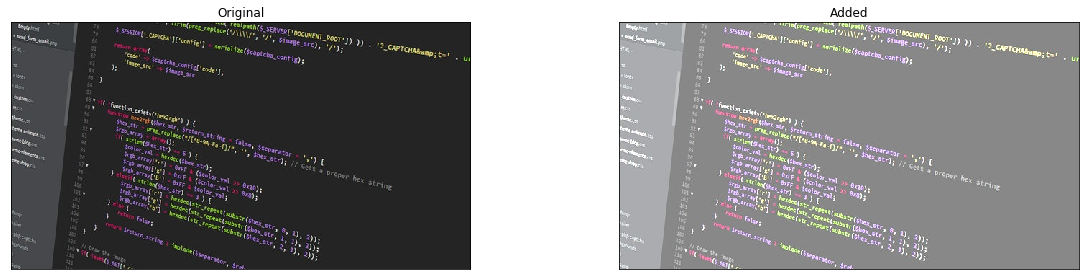

In [32]:
M = np.ones(image.shape, dtype = "uint8") * 100
added = cv2.add(image, M)
print(f'Original {image[150, 155]}, Added: {added[150, 155]}')

plt.figure(figsize=(20,10))
plt.subplot(2,2,1),plt.imshow(image)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(added)
plt.title('Added'), plt.xticks([]), plt.yticks([])
plt.show()

Original [37 38 42], subtracted: [0 0 0]


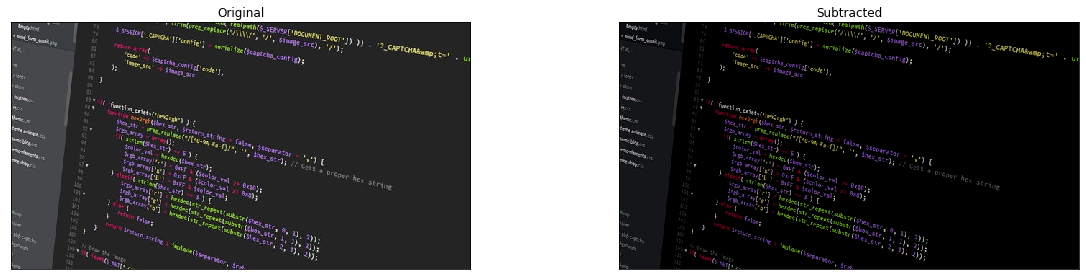

In [33]:
M = np.ones(image.shape, dtype = "uint8") * 50
subtracted = cv2.subtract(image, M)
print(f'Original {image[10, 10]}, subtracted: {subtracted[10, 10]}')

plt.figure(figsize=(20,10))
plt.subplot(2,2,1),plt.imshow(image)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(subtracted)
plt.title('Subtracted'), plt.xticks([]), plt.yticks([])
plt.show()

### 3.7 Bitwise Operations

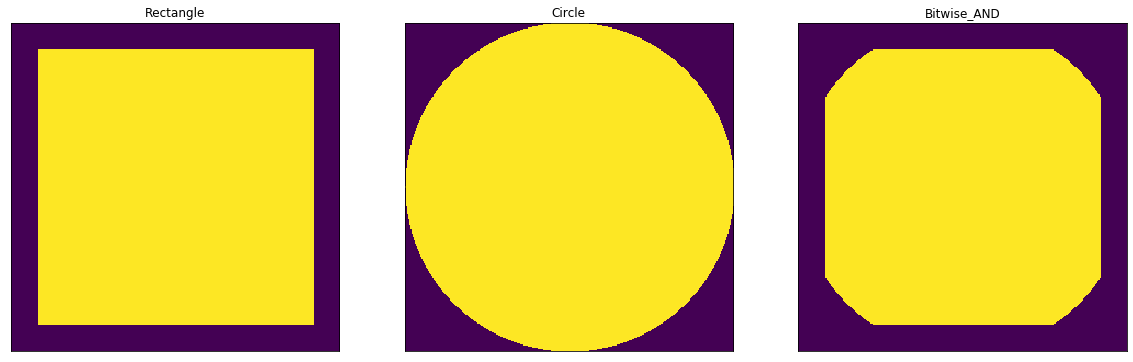

In [34]:
rectangle = np.zeros((300, 300), dtype = "uint8")
cv2.rectangle(rectangle, (25, 25), (275, 275), 255, -1)

circle = np.zeros((300, 300), dtype = "uint8")
cv2.circle(circle, (150, 150), 150, 255, -1)

bitwise_and = cv2.bitwise_and(rectangle, circle)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1),plt.imshow(rectangle)
plt.title('Rectangle'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(circle)
plt.title('Circle'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(bitwise_and)
plt.title('Bitwise_AND'), plt.xticks([]), plt.yticks([])
plt.show()

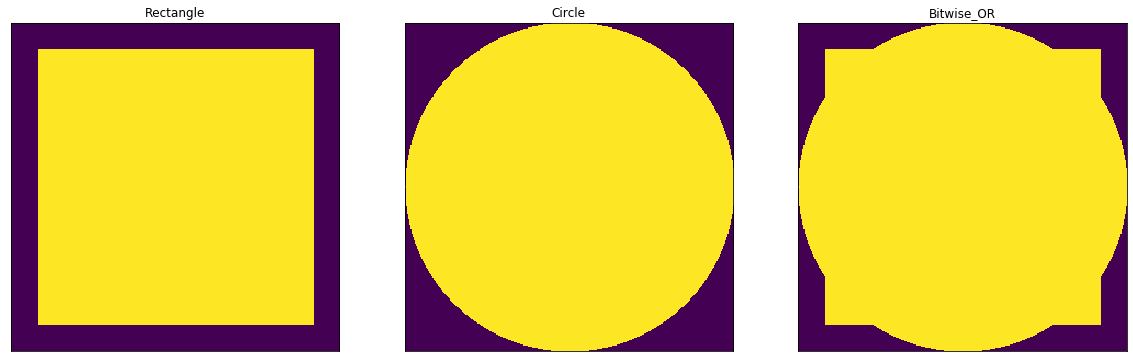

In [35]:
bitwise_or = cv2.bitwise_or(rectangle, circle)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1),plt.imshow(rectangle)
plt.title('Rectangle'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(circle)
plt.title('Circle'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(bitwise_or)
plt.title('Bitwise_OR'), plt.xticks([]), plt.yticks([])
plt.show()

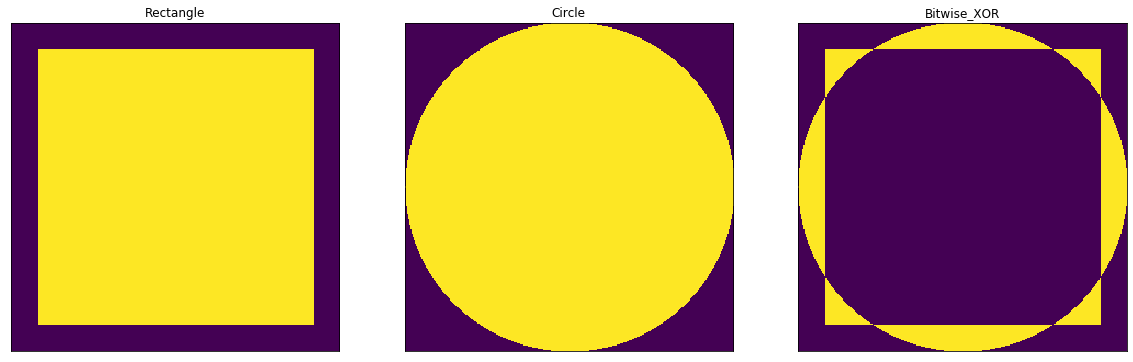

In [36]:
bitwise_xor = cv2.bitwise_xor(rectangle, circle)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1),plt.imshow(rectangle)
plt.title('Rectangle'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(circle)
plt.title('Circle'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(bitwise_xor)
plt.title('Bitwise_XOR'), plt.xticks([]), plt.yticks([])
plt.show()

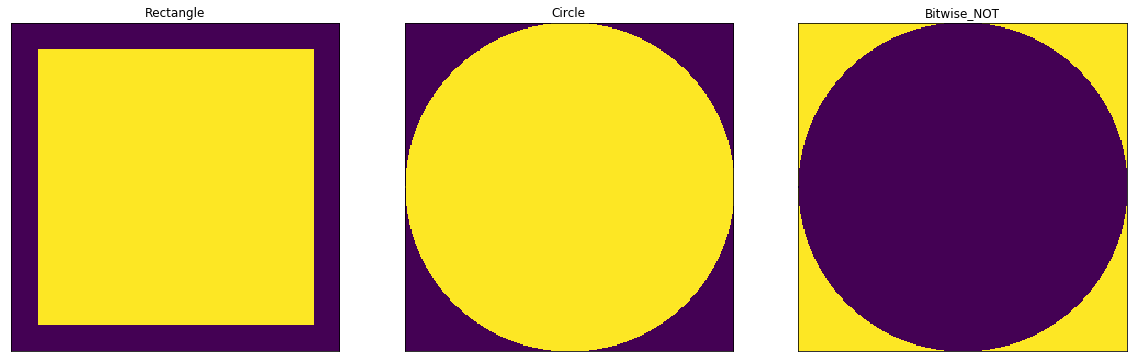

In [37]:
bitwise_not = cv2.bitwise_not(circle)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1),plt.imshow(rectangle)
plt.title('Rectangle'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(circle)
plt.title('Circle'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(bitwise_not)
plt.title('Bitwise_NOT'), plt.xticks([]), plt.yticks([])
plt.show()

### Homework: Complex Transformations - Apply multiple transformations at once on one image

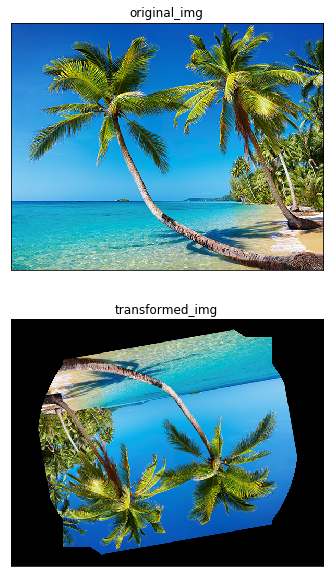

In [38]:
# TODO: Your code below

ori_img = np.flip(cv2.imread('../img/beach.png'), axis=2)


# flipping = flip the image along both axes
tf_img = cv2.flip(ori_img, -1)

#rotation
(h,w) = ori_img.shape[:2]
(cX, cY) = (w/2, h/2)
M = cv2.getRotationMatrix2D((cX, cY), 10, 0.8)

tf_img = cv2.warpAffine(tf_img, M, (w, h))


#bitwise transformation/operation
#first create a rectangle mask, then a circle mask, and combined them
rect_mask = np.zeros(ori_img.shape[:2], dtype="uint8")
cv2.rectangle(rect_mask, (int(cX-200), int(cY-200)), (int(cX+200), int(cY+200)), 255, -1)

circ_mask = np.zeros(ori_img.shape[:2], dtype="uint8")
cv2.circle(circ_mask, (int(cX), int(cY)), 250, 255, -1)

cbind_mask = cv2.bitwise_or(rect_mask, circ_mask)

#apply the combined mask to the image
tf_img = cv2.bitwise_and(tf_img, tf_img, mask=cbind_mask)


#display the images
plt.figure(figsize=(20,10))
plt.subplot(2,1,1), plt.imshow(ori_img)
plt.title('original_img'), plt.xticks([]), plt.yticks([])
plt.subplot(2,1,2), plt.imshow(tf_img)
plt.title('transformed_img'), plt.xticks([]), plt.yticks([])
plt.show()

### PROJECT: Write a script that would take an image as input and produces 10 random new geometrically transformed images.

In [ ]:
# TODO: Your code below

import argparse
import cv2
import numpy as np


## Construct the argument parser and parse the arguments
ap = argparse.ArgumentParse()
ap.add_argument('-i', '--image', required=True, help='Path to the image')
ap.add_argument('-o', '--output', required=True, help='Path to saving the image')
args = vars(ap.parse_args())


## load original image
ori_img = np.flip(cv2.imread(args['image']), axis=2)

#ori_img = np.flip(cv2.imread('../img/beach.png'), axis=2)


## 1. flipping = flip the image along both axes
flip_img = cv2.flip(ori_img, -1)

## 2. rotation
(h,w) = lego_img.shape[:2]
(cX, cY) = (w/2, h/2)

n = random.randrange(1,180)
rM = cv2.getRotationMatrix2D((cX, cY), n, 0.8)

rot_img = cv2.warpAffine(ori_img, rM, (w, h))


## 3. translation
tM = np.float32([[1, 0, -50], [0, 1, -90]])
tran_img = cv2.warpAffine(ori_img, tM, (ori_img.shape[1], ori_img.shape[0]))


## 4-7. bitwise transformation/operation
## first create & use a rectangle mask
rect_mask = np.zeros(lego_img.shape[:2], dtype="uint8")
cv2.rectangle(rect_mask, (int(cX-200), int(cY-200)), (int(cX+200), int(cY+200)), 255, -1)
rmask_img = cv2.bitwise_and(ori_img, ori_img, mask=rect_mask)

## create & use a circular mask
circ_mask = np.zeros(lego_img.shape[:2], dtype="uint8")
cv2.circle(circ_mask, (int(cX), int(cY)), 250, 255, -1)
cmask_img = cv2.bitwise_and(ori_img, ori_img, mask=circ_mask)


## combine the two masks and use the combined masks
## apply the combined mask to the image
bothmask = cv2.bitwise_and(rect_mask, circ_mask)
bothmask_img = cv2.bitwise_and(ori_img, ori_img, mask=bothmask)

eithmask = cv2.bitwise_or(rect_mask, circ_mask)
eithmask_img = cv2.bitwise_and(ori_img, ori_img, mask=eithmask)


## 8-9. Arthmetric transform / varying the brightness of the image
aM = np.ones(ori_img.shape, dtype = "uint8") * 150
bright_img = cv2.add(ori_img, aM)

dark_img = cv2.subtract(ori_img, aM)


## 10. resizing / rescaling
resize_ratio = 0.05

dim = tuple(map(lambda x: int(x * resize_ratio), reversed(ori_img.shape[:2])))
#dim = (int(ori_img.shape[1]*resize_ratio), int(ori_img.shape[0]*resize_ratio))

mthd = cv2.INTER_AREA
resize_img = cv2.resize(ori_img, dim, interpolation = mthd)


## save and create .jpg images
img_type = [("flip", flip_img), ("rot", rot_img), ("tran", tran_img), 
                 ("rmask", rmask_img), ("cmask", cmask_img), 
                  ("bothmask", bothmask_img), ("eithmask", eithmask_img),
                 ("bright", bright_img), ("dark", dark_img), ("resize", resize_img)]

for (name, img) in img_type:
    img= np.flip(img, axis=2)
    cv2.imwrite(f'{args["output"]}/{name}_img.jpg', img)


##display the images
#plt.figure(figsize=(20,10))
#plt.subplot(2,1,1), plt.imshow(ori_img)
#plt.title('original_img'), plt.xticks([]), plt.yticks([])
#plt.subplot(2,1,2), plt.imshow(resize_img)  #flip_img, rot_img, tran_img, rmask_img, cmask_img, bothmask_img, eithmask_img, bright_img, dark_img
#plt.title('transformed_img'), plt.xticks([]), plt.yticks([])
#plt.show()